Note : Use the drive link for the processed dataset

In [1]:
!pip3 install face_recognition

In [2]:
import glob

def load_video_files(directory):
    video_files = glob.glob(directory + '/*.mp4')
    video_files = [x.split("\\")[-1] for x in video_files]
    return video_files


load_video_files("preprocessed_data\Celeb_fake_face_only")



['id0_id16_0000.mp4',
 'id0_id16_0001.mp4',
 'id0_id16_0008.mp4',
 'id0_id17_0001.mp4',
 'id0_id1_0005.mp4',
 'id0_id20_0006.mp4',
 'id0_id28_0002.mp4',
 'id0_id2_0005.mp4',
 'id0_id4_0006.mp4',
 'id0_id9_0002.mp4',
 'id10_id11_0004.mp4',
 'id10_id11_0005.mp4',
 'id10_id11_0006.mp4',
 'id10_id11_0007.mp4',
 'id10_id12_0002.mp4',
 'id10_id12_0005.mp4',
 'id10_id12_0006.mp4',
 'id10_id13_0002.mp4',
 'id10_id13_0008.mp4',
 'id10_id7_0004.mp4',
 'id11_id7_0001.mp4',
 'id11_id7_0002.mp4',
 'id11_id7_0003.mp4',
 'id11_id7_0004.mp4',
 'id11_id7_0005.mp4',
 'id11_id7_0006.mp4',
 'id11_id7_0007.mp4',
 'id11_id7_0008.mp4',
 'id11_id7_0009.mp4',
 'id11_id7_0010.mp4',
 'id12_id10_0001.mp4',
 'id12_id10_0004.mp4',
 'id12_id10_0005.mp4',
 'id12_id10_0006.mp4',
 'id12_id7_0000.mp4',
 'id12_id7_0001.mp4',
 'id12_id7_0002.mp4',
 'id12_id7_0004.mp4',
 'id12_id7_0005.mp4',
 'id12_id7_0006.mp4',
 'id13_id10_0000.mp4',
 'id13_id10_0004.mp4',
 'id13_id10_0007.mp4',
 'id13_id10_0011.mp4',
 'id13_id10_0012.mp

In [3]:
# import pandas as pd

# # Step 1: Load Video Files from Directories
# real_video_files = load_video_files("real")
# fake_video_files = load_video_files("fake")


# # Step 2: Create DataFrame with Labels
# all_video_files = real_video_files + fake_video_files
# labels = ['REAL'] * len(real_video_files) + ["FAKE"] * len(fake_video_files)

# data = {'file': all_video_files, 'label': labels}
# df = pd.DataFrame(data)

# # Step 3: Save DataFrame to CSV
# df.to_csv('video_labels_real_fake.csv', index=False)


In [4]:
#THis code is to check if the video is corrupted or not..
#If the video is corrupted delete the video.
import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
#Check if the file is corrupted or not
def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      a = int(100/count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames
#extract a from from video
def frame_extract(path):
  vidObj = cv2.VideoCapture(path) 
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
# preprocessed_data preprocessed_data\DFDC_REAL_Face_only_data
video_fil =  glob.glob('preprocessed_data\Celeb_fake_face_only\*.mp4')
video_fil += glob.glob('preprocessed_data\Celeb_real_face_only\*.mp4')
video_fil += glob.glob('preprocessed_data\DFDC_REAL_Face_only_data\*.mp4')
video_fil += glob.glob('preprocessed_data\DFDC_FAKE_Face_only_data\*.mp4')
video_fil += glob.glob('preprocessed_data\FF_Face_only_data\*.mp4')
# print("Total no of videos :" , len(video_fil))
# print(video_fil)
# count = 0
# for i in video_fil:
#   try:
#     count+=1
#     validate_video(i,train_transforms)
#   except:
#     print("Number of video processed: " , count ," Remaining : " , (len(video_fil) - count))
#     print("Corrupted video is : " , i)
#     continue
# print((len(video_fil) - count))
video_fil

['preprocessed_data\\Celeb_fake_face_only\\id0_id16_0000.mp4',
 'preprocessed_data\\Celeb_fake_face_only\\id0_id16_0001.mp4',
 'preprocessed_data\\Celeb_fake_face_only\\id0_id16_0008.mp4',
 'preprocessed_data\\Celeb_fake_face_only\\id0_id17_0001.mp4',
 'preprocessed_data\\Celeb_fake_face_only\\id0_id1_0005.mp4',
 'preprocessed_data\\Celeb_fake_face_only\\id0_id20_0006.mp4',
 'preprocessed_data\\Celeb_fake_face_only\\id0_id28_0002.mp4',
 'preprocessed_data\\Celeb_fake_face_only\\id0_id2_0005.mp4',
 'preprocessed_data\\Celeb_fake_face_only\\id0_id4_0006.mp4',
 'preprocessed_data\\Celeb_fake_face_only\\id0_id9_0002.mp4',
 'preprocessed_data\\Celeb_fake_face_only\\id10_id11_0004.mp4',
 'preprocessed_data\\Celeb_fake_face_only\\id10_id11_0005.mp4',
 'preprocessed_data\\Celeb_fake_face_only\\id10_id11_0006.mp4',
 'preprocessed_data\\Celeb_fake_face_only\\id10_id11_0007.mp4',
 'preprocessed_data\\Celeb_fake_face_only\\id10_id12_0002.mp4',
 'preprocessed_data\\Celeb_fake_face_only\\id10_id12_0

In [5]:
#to load preprocessod video to memory
import json
import glob
import numpy as np
import cv2
import copy
import random

# video_files =  glob.glob('real\*.mp4')
# video_files += glob.glob('fake\*.mp4')
# video_files += glob.glob('preprocessed_data\DFDC_REAL_Face_only_data\*.mp4')
# video_files += glob.glob('preprocessed_data\DFDC_FAKE_Face_only_data\*.mp4')
# video_files += glob.glob('preprocessed_data\FF_Face_only_data\*.mp4')
video_files = video_fil
random.shuffle(video_files)
random.shuffle(video_files)
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))
video_files

frames are  [148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 140, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 114, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 134, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 122, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 14

['preprocessed_data\\FF_Face_only_data\\479_706.mp4',
 'preprocessed_data\\DFDC_REAL_Face_only_data\\htrkeemhkr.mp4',
 'preprocessed_data\\DFDC_REAL_Face_only_data\\sxryoeigag.mp4',
 'preprocessed_data\\FF_Face_only_data\\143_140.mp4',
 'preprocessed_data\\DFDC_FAKE_Face_only_data\\cwmahupvmg.mp4',
 'preprocessed_data\\DFDC_REAL_Face_only_data\\qabreprhxg.mp4',
 'preprocessed_data\\FF_Face_only_data\\660_634.mp4',
 'preprocessed_data\\DFDC_REAL_Face_only_data\\pslnizmjib.mp4',
 'preprocessed_data\\FF_Face_only_data\\242_182.mp4',
 'preprocessed_data\\Celeb_fake_face_only\\id44_id39_0001.mp4',
 'preprocessed_data\\Celeb_real_face_only\\id6_0004.mp4',
 'preprocessed_data\\FF_Face_only_data\\286.mp4',
 'preprocessed_data\\Celeb_real_face_only\\id8_0001.mp4',
 'preprocessed_data\\Celeb_real_face_only\\id0_0005.mp4',
 'preprocessed_data\\DFDC_FAKE_Face_only_data\\bjkjjutppv.mp4',
 'preprocessed_data\\Celeb_real_face_only\\id45_0001.mp4',
 'preprocessed_data\\DFDC_FAKE_Face_only_data\\ehypjo

In [6]:
# load the video name and labels from csv
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        temp_video = video_path.split('\\')[-1]
        #print(temp_video)
        label = self.labels.iloc[(self.labels.loc[self.labels["file"] == temp_video].index.values[0]),1]
        if(label == 'FAKE'):
          label = 0
        if(label == 'REAL'):
          label = 1
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        #print("length:" , len(frames), "label",label)
        return frames,label
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path) 
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
#plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()
#count the number of fake and real videos
def number_of_real_and_fake_videos(data_list):
  header_list = ["file","label"]
  lab = pd.read_csv('Gobal_metadata.csv',names=header_list)
  fake = 0
  real = 0
  for i in data_list:
    temp_video = i.split('\\')[-1]
    # labels[labels["file"] == temp_video]["label"].values[0]
    label = lab.iloc[(lab.loc[lab["file"] == temp_video].index.values[0]),1]
    if(label == 'FAKE'):
      fake+=1
    if(label == 'REAL'):
      real+=1
  return real,fake

In [7]:
#count the number of fake and real videos
def number_of_real_and_fake_videos(data_list):
  header_list = ["file","label"]
  lab = pd.read_csv('Gobal_metadata.csv',names=header_list)
  fake = 0
  real = 0
  for i in data_list:
    temp_video = i.split('\\')[-1]
    # labels[labels["file"] == temp_video]["label"].values[0]
    label = lab.iloc[(lab.loc[lab["file"] == temp_video].index.values[0]),1]
    if(label == 'FAKE'):
      fake+=1
    if(label == 'REAL'):
      real+=1
  return real,fake

In [8]:
# header_list = ["file","label"]
# lab = pd.read_csv('video_labels_real_fake.csv',names=header_list)
# temp_video = video_files[1].split('\\')[-1]
# label = lab.iloc[(lab.loc[lab["file"] == temp_video].index.values[0]),1]
# label

In [9]:
# load the labels and video in data loader
import random
import pandas as pd
from sklearn.model_selection import train_test_split

header_list = ["file","label"]
labels = pd.read_csv('Gobal_metadata.csv',names=header_list)
#print(labels)
train_videos = video_files[:int(0.8*len(video_files))]
valid_videos = video_files[int(0.8*len(video_files)):]
print("train : " , len(train_videos))
print("test : " , len(valid_videos))
# train_videos,valid_videos = train_test_split(data,test_size = 0.2)
# print(train_videos)


C:\Users\mahes\AppData\Local\Temp\ipykernel_84352\1219272119.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


train :  5141
test :  1286


In [10]:
train_videos[0].split('\\')[-1]

'479_706.mp4'

In [11]:

print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos)[0]," Fake:",number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos)[0]," Fake:",number_of_real_and_fake_videos(valid_videos)[1])



TRAIN:  Real: 2653  Fake: 2488
TEST:  Real: 648  Fake: 638


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


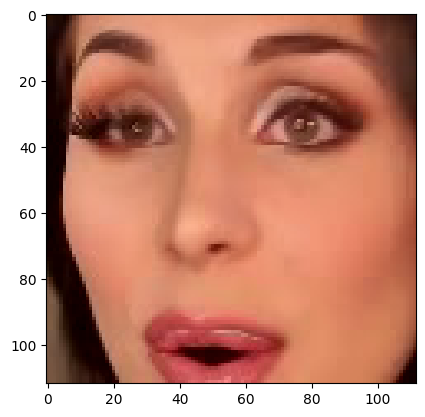

tensor([[[[-1.7069, -1.7069, -1.7069,  ..., -1.4843, -1.3987, -1.3815],
          [-1.7069, -1.6898, -1.6727,  ..., -1.4500, -1.3815, -1.3644],
          [-1.5699, -1.5528, -1.6042,  ..., -1.3987, -1.3644, -1.3815],
          ...,
          [-0.5938, -0.5424, -0.5767,  ..., -2.1179, -1.9467, -1.9467],
          [-0.5938, -0.5424, -0.5596,  ..., -2.0494, -1.9124, -1.8953],
          [-0.5938, -0.5424, -0.5596,  ..., -2.0494, -1.9809, -1.9467]],

         [[-1.5280, -1.5280, -1.6155,  ..., -1.4230, -1.4230, -1.4055],
          [-1.5280, -1.5105, -1.5805,  ..., -1.3880, -1.4055, -1.3880],
          [-1.5105, -1.4930, -1.5805,  ..., -1.3354, -1.3529, -1.3704],
          ...,
          [-0.3025, -0.2500, -0.2675,  ..., -2.0357, -1.9132, -1.9132],
          [-0.3025, -0.2500, -0.2500,  ..., -1.9832, -1.8606, -1.8431],
          [-0.3025, -0.2500, -0.2500,  ..., -1.9832, -1.9307, -1.8957]],

         [[-1.2467, -1.2467, -1.3861,  ..., -1.0027, -1.0550, -1.0376],
          [-1.2467, -1.2293, -

In [12]:

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

train_data = video_dataset(train_videos,labels,sequence_length = 10,transform = train_transforms)
#print(train_data)
val_data = video_dataset(valid_videos,labels,sequence_length = 10,transform = train_transforms)
train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 0)
valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 0)
image,label = train_data[0]
im_plot(image[0,:,:,:])
image

In [13]:
# from torch import nn
# from torchvision import models

# class Model(nn.Module):
#     def __init__(self, num_classes, latent_dim=2048, lstm_layers=1, hidden_dim=2048, bidirectional=False):
#         super(Model, self).__init__()
#         # Load pre-trained ResNet-101 model
#         model = models.resnet101(pretrained=True)
        
#         # Remove the fully connected layer and average pooling layer from the original ResNet-101
#         self.model = nn.Sequential(*list(model.children())[:-2])
        
#         # Define LSTM layer
#         self.lstm = nn.LSTM(latent_dim, hidden_dim, lstm_layers, bidirectional)
        
#         # Activation function
#         self.relu = nn.LeakyReLU()
        
#         # Dropout layer
#         self.dp = nn.Dropout(0.4)
        
#         # Linear layer for classification
#         self.linear1 = nn.Linear(2048, num_classes)  # Adjust output features for ResNet-101
        
#         # Adaptive average pooling
#         self.avgpool = nn.AdaptiveAvgPool2d(1)

#     def forward(self, x):
#         batch_size, seq_length, c, h, w = x.shape
        
#         # Reshape the input tensor to combine batch size and sequence length
#         x = x.view(batch_size * seq_length, c, h, w)
        
#         # Pass through the ResNet-101 model
#         fmap = self.model(x)
        
#         # Apply adaptive average pooling
#         x = self.avgpool(fmap)
        
#         # Reshape for LSTM input
#         x = x.view(batch_size, seq_length, 2048)
        
#         # Pass through LSTM
#         x_lstm, _ = self.lstm(x, None)
        
#         # Return feature maps and predictions
#         return fmap, self.dp(self.linear1(torch.mean(x_lstm, dim=1)))


In [14]:
# from torch import nn
# from torchvision import models

# class Model(nn.Module):
#     def __init__(self, num_classes, lstm_layers=1, hidden_dim=2048, bidirectional=False):
#         super(Model, self).__init__()
#         self.vgg16 = models.vgg16(pretrained=True)  # Load pre-trained VGG16 model
#         self.features = self.vgg16.features[:-1]  # Remove the last max pooling layer
#         self.avgpool = nn.AdaptiveAvgPool2d((1, 1))  # Adaptive average pooling to generate fixed-size feature maps
#         self.lstm = nn.LSTM(512, hidden_dim, lstm_layers, bidirectional)  # Adjust input features for VGG-16
#         self.dp = nn.Dropout(0.4)
#         self.linear1 = nn.Linear(hidden_dim * (2 if bidirectional else 1), num_classes)

#     def forward(self, x):
#         batch_size, seq_length, c, h, w = x.shape
        
#         # Reshape the input tensor to combine batch size and sequence length
#         x = x.view(batch_size * seq_length, c, h, w)
        
#         # Pass through the VGG16 model's feature extraction layers
#         fmap = self.features(x)
        
#         # Apply adaptive average pooling
#         x = self.avgpool(fmap)
        
#         # Reshape for LSTM input
#         x = x.view(batch_size, seq_length, -1)
        
#         # Pass through LSTM
#         x_lstm, _ = self.lstm(x)
        
#         # Return feature maps and predictions
#         return fmap, self.dp(self.linear1(torch.mean(x_lstm, dim=1)))


In [15]:
# from torch import nn
# from torchvision import models

# class Model(nn.Module):
#     def __init__(self, num_classes, lstm_layers=1, hidden_dim=1024, bidirectional=False):
#         super(Model, self).__init__()
#         self.densenet = models.densenet121(pretrained=True)  # Load pre-trained DenseNet121 model
#         self.features = nn.Sequential(*list(self.densenet.features.children())[:-1])  # Remove the last max pooling layer
#         self.avgpool = nn.AdaptiveAvgPool2d((1, 1))  # Adaptive average pooling to generate fixed-size feature maps
#         self.lstm = nn.LSTM(1024, hidden_dim, lstm_layers, bidirectional)  # Adjust input features for DenseNet121
#         self.dp = nn.Dropout(0.4)
#         self.linear1 = nn.Linear(hidden_dim * (2 if bidirectional else 1), num_classes)

#     def forward(self, x):
#         batch_size, seq_length, c, h, w = x.shape
        
#         # Reshape the input tensor to combine batch size and sequence length
#         x = x.view(batch_size * seq_length, c, h, w)
        
#         # Pass through the DenseNet121 model's feature extraction layers
#         fmap = self.features(x)
        
#         # Apply adaptive average pooling
#         x = self.avgpool(fmap)
        
#         # Reshape for LSTM input
#         x = x.view(batch_size, seq_length, -1)
        
#         # Pass through LSTM
#         x_lstm, _ = self.lstm(x)
        
#         # Return feature maps and predictions
#         return fmap, self.dp(self.linear1(torch.mean(x_lstm, dim=1)))


In [16]:
# from torch import nn
# from torchvision import models

# class Model(nn.Module):
#     def __init__(self, num_classes, latent_dim=2048, lstm_layers=1, hidden_dim=2048, bidirectional=False):
#         super(Model, self).__init__()
#         # Load pre-trained ResNet-152 model
#         model = models.resnet152(pretrained=True)
        
#         # Remove the fully connected layer and average pooling layer from the original ResNet-152
#         self.model = nn.Sequential(*list(model.children())[:-2])
        
#         # Define LSTM layer
#         self.lstm = nn.LSTM(latent_dim, hidden_dim, lstm_layers, bidirectional)
        
#         # Activation function
#         self.relu = nn.LeakyReLU()
        
#         # Dropout layer
#         self.dp = nn.Dropout(0.4)
        
#         # Linear layer for classification
#         self.linear1 = nn.Linear(2048, num_classes)  # Adjust output features for ResNet-152
        
#         # Adaptive average pooling
#         self.avgpool = nn.AdaptiveAvgPool2d(1)

#     def forward(self, x):
#         batch_size, seq_length, c, h, w = x.shape
        
#         # Reshape the input tensor to combine batch size and sequence length
#         x = x.view(batch_size * seq_length, c, h, w)
        
#         # Pass through the ResNet-152 model
#         fmap = self.model(x)
        
#         # Apply adaptive average pooling
#         x = self.avgpool(fmap)
        
#         # Reshape for LSTM input
#         x = x.view(batch_size, seq_length, 2048)
        
#         # Pass through LSTM
#         x_lstm, _ = self.lstm(x, None)
        
#         # Return feature maps and predictions
#         return fmap, self.dp(self.linear1(torch.mean(x_lstm, dim=1)))


In [17]:
from torch import nn
from torchvision import models

class Model(nn.Module):
    def __init__(self, num_classes, lstm_layers=1, hidden_dim=1920, bidirectional=False):
        super(Model, self).__init__()
        # Load pre-trained DenseNet-201 model
        model = models.densenet201(pretrained=True)
        
        # Remove the fully connected layer from the original DenseNet-201
        self.model = nn.Sequential(*list(model.children())[:-1])
        
        # Define latent_dim based on the number of output features of the DenseNet-201 model
        latent_dim = model.classifier.in_features
        
        # Define LSTM layer
        self.lstm = nn.LSTM(latent_dim, hidden_dim, lstm_layers, bidirectional)
        
        # Activation function
        self.relu = nn.LeakyReLU()
        
        # Dropout layer
        self.dp = nn.Dropout(0.4)
        
        # Linear layer for classification
        self.linear1 = nn.Linear(hidden_dim * (2 if bidirectional else 1), num_classes)
        
        # Adaptive average pooling
        self.avgpool = nn.AdaptiveAvgPool2d(1)

    def forward(self, x):
        batch_size, seq_length, c, h, w = x.shape
        
        # Reshape the input tensor to combine batch size and sequence length
        x = x.view(batch_size * seq_length, c, h, w)
        
        # Pass through the DenseNet-201 model
        fmap = self.model(x)
        
        # Apply adaptive average pooling
        x = self.avgpool(fmap)
        
        # Reshape for LSTM input
        x = x.view(batch_size, seq_length, -1)
        
        # Pass through LSTM
        x_lstm, _ = self.lstm(x, None)
        
        # Return feature maps and predictions
        return fmap, self.dp(self.linear1(torch.mean(x_lstm, dim=1)))


In [18]:
# from torch import nn
# from torchvision import models

# class Model(nn.Module):
#     def __init__(self, num_classes, lstm_layers=1, hidden_dim=2048, bidirectional=False):
#         super(Model, self).__init__()
#         self.vgg19 = models.vgg19(pretrained=True)  # Load pre-trained VGG19 model
#         self.features = self.vgg19.features[:-1]  # Remove the last max pooling layer
#         self.avgpool = nn.AdaptiveAvgPool2d((1, 1))  # Adaptive average pooling to generate fixed-size feature maps
#         self.lstm = nn.LSTM(512, hidden_dim, lstm_layers, bidirectional)
#         self.dp = nn.Dropout(0.4)
#         self.linear1 = nn.Linear(hidden_dim * (2 if bidirectional else 1), num_classes)

#     def forward(self, x):
#         batch_size, seq_length, c, h, w = x.shape
        
#         # Reshape the input tensor to combine batch size and sequence length
#         x = x.view(batch_size * seq_length, c, h, w)
        
#         # Pass through the VGG19 model's feature extraction layers
#         fmap = self.features(x)
        
#         # Apply adaptive average pooling
#         x = self.avgpool(fmap)
        
#         # Reshape for LSTM input
#         x = x.view(batch_size, seq_length, -1)
        
#         # Pass through LSTM
#         x_lstm, _ = self.lstm(x)
        
#         # Return feature maps and predictions
#         return fmap, self.dp(self.linear1(torch.mean(x_lstm, dim=1)))


In [19]:
model = Model(num_classes=2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

c:\Users\mahes\anaconda3\envs\tf3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\mahes\anaconda3\envs\tf3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [20]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os


def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _, outputs = model(inputs)
        loss = criterion(outputs, targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
            "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
            % (epoch, num_epochs, i, len(data_loader), losses.avg, accuracies.avg)
        )
    torch.save(model.state_dict(), "checkpoint3.pt")
    return losses.avg, accuracies.avg


def test(epoch, model, data_loader, criterion):
    print("Testing")
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _, outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
            _, p = torch.max(outputs, 1)
            true += (
                (targets.type(torch.cuda.LongTensor))
                .detach()
                .cpu()
                .numpy()
                .reshape(len(targets))
                .tolist()
            )
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                % (i, len(data_loader), losses.avg, accuracies.avg)
            )
        print("\nAccuracy {}".format(accuracies.avg))
    return true, pred, losses.avg, accuracies.avg


class AverageMeter(object):
    """Computes and stores the average and current value"""

    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100 * n_correct_elems / batch_size

In [21]:
import seaborn as sn
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

In [22]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

[Epoch 1/20] [Batch 1285 / 1286] [Loss: 0.651515, Acc: 62.52%]Testing
[Batch 321 / 322]  [Loss: 0.531918, Acc: 73.48%]
Accuracy 73.48367029548989
[Epoch 2/20] [Batch 1285 / 1286] [Loss: 0.549638, Acc: 75.30%]Testing
[Batch 321 / 322]  [Loss: 0.445190, Acc: 80.48%]
Accuracy 80.48211508553655
[Epoch 3/20] [Batch 1285 / 1286] [Loss: 0.489948, Acc: 79.61%]Testing
[Batch 321 / 322]  [Loss: 0.428986, Acc: 80.48%]
Accuracy 80.48211508553655
[Epoch 4/20] [Batch 1285 / 1286] [Loss: 0.448163, Acc: 82.98%]Testing
[Batch 321 / 322]  [Loss: 0.387298, Acc: 82.50%]
Accuracy 82.50388802488335
[Epoch 5/20] [Batch 1285 / 1286] [Loss: 0.422787, Acc: 84.34%]Testing
[Batch 321 / 322]  [Loss: 0.405857, Acc: 82.58%]
Accuracy 82.58164852255054
[Epoch 6/20] [Batch 1285 / 1286] [Loss: 0.404250, Acc: 85.16%]Testing
[Batch 321 / 322]  [Loss: 0.346584, Acc: 84.99%]
Accuracy 84.99222395023328
[Epoch 7/20] [Batch 1285 / 1286] [Loss: 0.373517, Acc: 86.93%]Testing
[Batch 321 / 322]  [Loss: 0.366970, Acc: 83.98%]
Accur

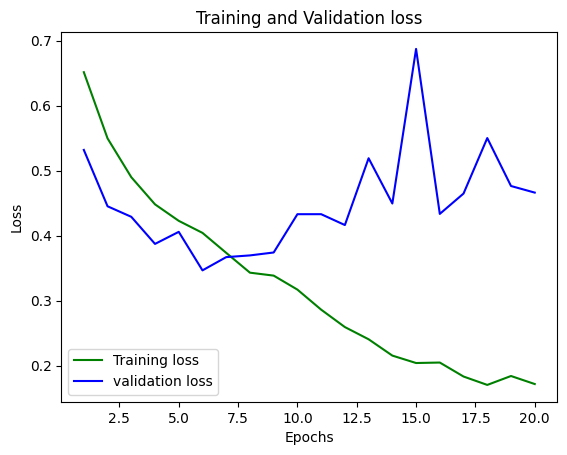

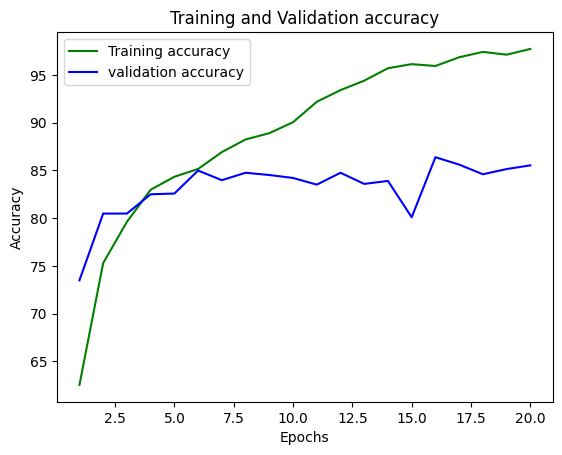

[[522 116]
 [ 70 578]]
True positive =  522
False positive =  116
False negative =  70
True negative =  578




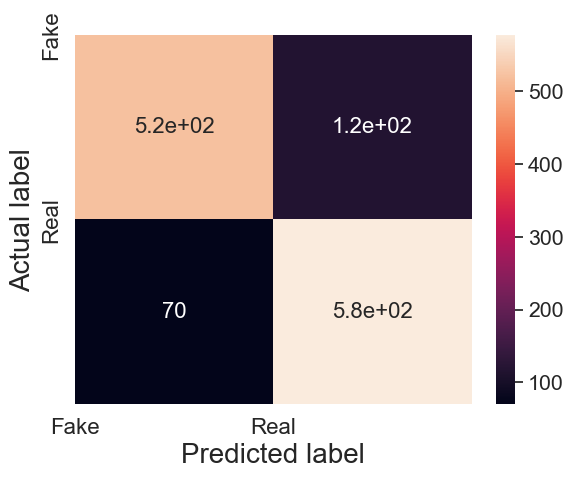

Calculated Accuracy 85.53654743390358


In [23]:
from sklearn.metrics import confusion_matrix
#learning rate
lr = 1e-5#0.001
#number of epochs 
num_epochs = 20

optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-5)

#class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
#criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()
criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []
for epoch in range(1,num_epochs+1):
    l, acc = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))
print_confusion_matrix(true,pred)